# 변경
age, 출생연도 제거 ->age_range  
업종대분류 생성 ->업종코드, 업종명 제거  
행정동번호,기준일자 제거  
행정동명 clustering 방법 생각중  
일단 행정동명 제거후 원핫인코딩 시도  
원핫인코딩..에러 데이터프레임문제?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from tqdm.notebook import tqdm


In [3]:
path = "C:/Users/ekgus/Desktop/카드소비/"

In [3]:
os.listdir(path)

['.ipynb_checkpoints',
 '20230317.ipynb',
 '20230401.ipynb',
 'august.csv',
 'df1.csv',
 'df2.csv',
 'DownloadData_20230304121208.zip',
 'EX_F_BBP23_00019.csv',
 'httpswww.bigdata-finance.krdatasetd.txt',
 'july.csv',
 'june.csv',
 'list.txt',
 'pre_process_20230318.ipynb',
 '분류.txt']

In [4]:
june = pd.read_csv("june.csv",encoding = 'cp949',low_memory =False)

In [5]:
july = pd.read_csv("july.csv", encoding = 'cp949', low_memory =False)

In [6]:
august = pd.read_csv("august.csv", encoding = 'cp949', low_memory = False)

In [7]:
print("june", len(june))
print("july", len(july))
print("august", len(august))
s = len(june) + len(july) + len(august)
s

june 10061735
july 9756266
august 7317159


27135160

In [8]:
df = pd.concat([june, july], ignore_index=True)
df

,strd_date,strd_tizn_val,ctpr_nm,ccg_nm,adn_dgnm,adng_no,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19817996,20220701,0,부산광역시,중구,부평동,21010560,코나,4020,슈퍼마켓,1982,M,1,3490
19817997,20220701,0,부산광역시,중구,부평동,21010560,코나,8001,일반한식,1989,M,1,13500
19817998,20220701,0,부산광역시,중구,부평동,21010560,코나,8001,일반한식,1996,F,1,44000
19817999,20220701,0,부산광역시,중구,부평동,21010560,코나,8001,일반한식,1999,M,1,34500


In [9]:
df.to_csv("train.csv", index = False)

In [10]:
# 데이터 불러오기
train= pd.read_csv("train.csv")
train.head()

,strd_date,strd_tizn_val,ctpr_nm,ccg_nm,adn_dgnm,adng_no,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900


In [11]:
print(train.isnull().sum())

strd_date        0
strd_tizn_val    0
ctpr_nm          0
ccg_nm           0
adn_dgnm         0
adng_no          0
cardc_nm         0
tpbuz_cd         0
tpbuz_nm         0
bth_yr           0
sex_cd           0
trns_cnt         0
ttl_trns_amt     0
dtype: int64


In [12]:
# 중복값 없음!
train.duplicated().sum()

0

In [13]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818001 entries, 0 to 19818000
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   strd_date      int64 
 1   strd_tizn_val  int64 
 2   ctpr_nm        object
 3   ccg_nm         object
 4   adn_dgnm       object
 5   adng_no        int64 
 6   cardc_nm       object
 7   tpbuz_cd       int64 
 8   tpbuz_nm       object
 9   bth_yr         int64 
 10  sex_cd         object
 11  trns_cnt       int64 
 12  ttl_trns_amt   int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ GB
None


In [14]:
train = train.rename(columns = {'strd_date':'기준일자', 'strd_tizn_val':'기준시간대값', 'ctpr_nm':'시도명', 'ccg_nm':'시군구명', 'adn_dgnm':'행정동명',
       'adng_no':'행정동번호', 'cardc_nm':'카드사명', 'tpbuz_cd':'업종코드', 'tpbuz_nm':'업종명', 'bth_yr':'출생년도', 'sex_cd':'성별코드',
       'trns_cnt':'거래건수', 'ttl_trns_amt':'총거래금액'})

In [15]:
train.head()

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액
0,20220601,0,부산광역시,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,부산광역시,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,부산광역시,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900


In [16]:
train.describe()

,기준일자,기준시간대값,행정동번호,업종코드,출생년도,거래건수,총거래금액
count,1.981800e+07,1.981800e+07,1.981800e+07,1.981800e+07,1.981800e+07,1.981800e+07,1.981800e+07
mean,2.022066e+07,1.470929e+01,2.110174e+07,6.230748e+03,1.977512e+03,1.109954e+00,2.329454e+04
std,5.111427e+01,4.480410e+00,8.613922e+04,2.137474e+03,1.486486e+01,4.024942e-01,4.861066e+04
min,2.022060e+07,0.000000e+00,2.101051e+07,1.001000e+03,1.921000e+03,1.000000e+00,1.000000e+00
25%,2.022061e+07,1.200000e+01,2.106055e+07,4.020000e+03,1.967000e+03,1.000000e+00,4.500000e+03
50%,2.022063e+07,1.500000e+01,2.109064e+07,7.101000e+03,1.978000e+03,1.000000e+00,9.000000e+03
75%,2.022072e+07,1.800000e+01,2.112059e+07,8.006000e+03,1.989000e+03,1.000000e+00,2.250000e+04
max,2.022073e+07,2.300000e+01,2.151033e+07,9.998000e+03,4.607000e+03,7.100000e+01,2.413460e+06


In [17]:
#평균, 표준편차, quantile확인 -> 거래건수 이상치 생각해볼 필요
# min, max 에서 출생년도 잘못된 값 발견.
pd.set_option('display.float_format', '{:.2f}'.format)
train.describe()

,기준일자,기준시간대값,행정동번호,업종코드,출생년도,거래건수,총거래금액
count,19818001.00,19818001.00,19818001.00,19818001.00,19818001.00,19818001.00,19818001.00
mean,20220664.36,14.71,21101736.54,6230.75,1977.51,1.11,23294.54
std,51.11,4.48,86139.22,2137.47,14.86,0.40,48610.66
min,20220601.00,0.00,21010510.00,1001.00,1921.00,1.00,1.00
25%,20220614.00,12.00,21060550.00,4020.00,1967.00,1.00,4500.00
50%,20220630.00,15.00,21090640.00,7101.00,1978.00,1.00,9000.00
75%,20220715.00,18.00,21120590.00,8006.00,1989.00,1.00,22500.00
max,20220731.00,23.00,21510330.00,9998.00,4607.00,71.00,2413460.00


<AxesSubplot:>

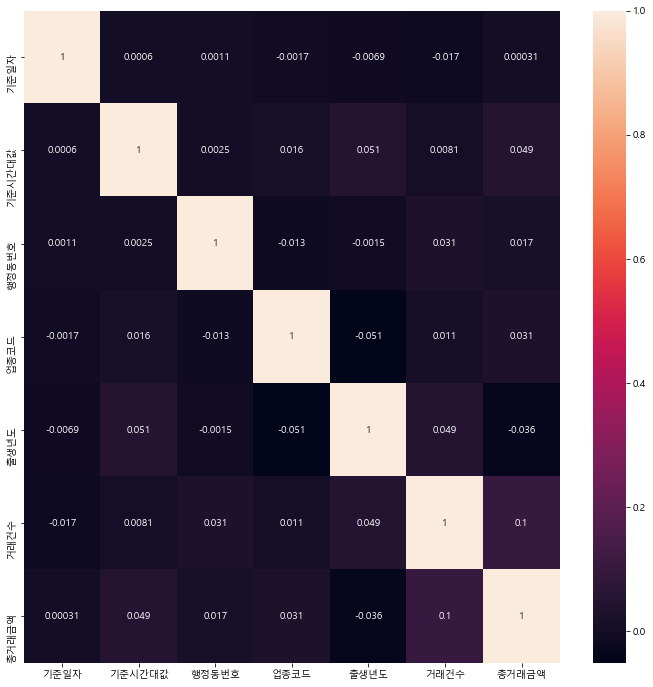

In [18]:
#변수 상관관계 확인 ->큰 상관관계 보이지 않음.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic' #->한글 안깨지게
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

# ctpr_nm 시도명

In [20]:
train.시도명.unique()

array(['부산광역시'], dtype=object)

In [21]:
#데이터 전체가 부산광역시 이므로 제거
train=train.drop(['시도명'], axis=1)

In [22]:
train.head()

,기준일자,기준시간대값,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액
0,20220601,0,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900


# adng_no 행정동명 & 행정동번호

In [23]:
# 행정동명과 행정동 번호가 1:1 매칭이라면 둘 중 한 정보만 써도 될 것이다.
# == 만약 부산에 같은 동 이름을 가진 동네가 여러개가 아니라면..

len(train['행정동명'].unique())

205

In [24]:
train.groupby('행정동명')['행정동번호'].nunique().sum()

#행정동 번호와 행정동명 유니크 개수가 같음.-> 행정동번호 제거

205

In [25]:
train=train.drop(['행정동번호'], axis=1)

In [26]:
train.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액
0,20220601,0,중구,대청동,코나,4010,편 의 점,1973,M,1,7350
1,20220601,0,중구,중앙동,부산,4010,편 의 점,1981,F,1,3700
2,20220601,0,중구,중앙동,부산,4010,편 의 점,1992,M,1,7500
3,20220601,0,중구,중앙동,부산,4010,편 의 점,1995,M,1,2700
4,20220601,0,중구,중앙동,코나,4010,편 의 점,1976,M,1,13900


# tpbuz_nm 업종명

In [93]:
#print(len(df['업종명'].unique()))
#print(df.groupby('업종명')['업종코드'].nunique().sum())

#-> 모두 210. 1:1 매칭이므로 업종코드 제거

210
210


In [94]:
#df=df.drop(['업종코드'], axis=1)
#df.head()

,기준일자,기준시간대값,시도명,시군구명,행정동명,카드사명,업종명,출생년도,성별코드,거래건수,총거래금액,요일,age,age_range
0,2022-06-01,0,부산광역시,중구,대청동,코나,편 의 점,1973,M,1,7350,Wednesday,50,50
1,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1981,F,1,3700,Wednesday,42,40
2,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1992,M,1,7500,Wednesday,31,30
3,2022-06-01,0,부산광역시,중구,중앙동,부산,편 의 점,1995,M,1,2700,Wednesday,28,20
4,2022-06-01,0,부산광역시,중구,중앙동,코나,편 의 점,1976,M,1,13900,Wednesday,47,40


In [78]:
sorted_numbers = sorted(train.업종코드.unique())
print(sorted_numbers)  

[1001, 1002, 1003, 1010, 1020, 1110, 1122, 1123, 1130, 2001, 2002, 2010, 2020, 2102, 2111, 2112, 2113, 2114, 2120, 2121, 2130, 2199, 2201, 2202, 2210, 2215, 2220, 2230, 2240, 2250, 2251, 2299, 3001, 3002, 3099, 3101, 3102, 3199, 3201, 3202, 3210, 3301, 3302, 3304, 3305, 3306, 3307, 3308, 3309, 3311, 3313, 3399, 3401, 3402, 3499, 4004, 4010, 4020, 4021, 4050, 4080, 4099, 4110, 4111, 4121, 4199, 4201, 4203, 4204, 4205, 4206, 4208, 4209, 4210, 4299, 4301, 4302, 4303, 4304, 4399, 4401, 4410, 4411, 4412, 4420, 4421, 4430, 4481, 4499, 5001, 5002, 5003, 5010, 5030, 5040, 5050, 5099, 5101, 5102, 5103, 5104, 5105, 5106, 5121, 5122, 5191, 5192, 5199, 5201, 5202, 5210, 5299, 6004, 6101, 6102, 6103, 6110, 6111, 6120, 6130, 6140, 6150, 6199, 7001, 7010, 7014, 7015, 7020, 7021, 7022, 7040, 7041, 7042, 7044, 7050, 7060, 7099, 7101, 7102, 7103, 7105, 7110, 7111, 7112, 7120, 7121, 7199, 8001, 8002, 8003, 8004, 8005, 8006, 8010, 8013, 8021, 8031, 8101, 8201, 8301, 8302, 8303, 8310, 8320, 8399, 8401, 840

In [29]:
#2250, 2251, 3311, 3313, 4208, 4209, 4412, 4481, 5003, 5105, 5106, 5191, 5192, 6103, 7044, 8021, 8031, 8303, 9006, 9210
train[train['업종코드']==9006]

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일,거래금액
11820,2022-06-01,7,부산진구,양정1동,부산,9006,목재석재철물,M,1,22000,60,Wednesday,22000.0
17754,2022-06-01,8,동래구,명장2동,부산,9006,목재석재철물,F,1,14300,50,Wednesday,14300.0
20768,2022-06-01,8,금정구,선두구동,코나,9006,목재석재철물,M,1,33000,60,Wednesday,33000.0
25000,2022-06-01,9,부산진구,양정1동,코나,9006,목재석재철물,F,1,5000,60,Wednesday,5000.0
28248,2022-06-01,9,북구,구포1동,코나,9006,목재석재철물,F,1,14000,50,Wednesday,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19741851,2022-07-31,17,연제구,거제3동,하나,9006,목재석재철물,F,1,8000,50,Sunday,8000.0
19752835,2022-07-31,18,북구,구포1동,부산,9006,목재석재철물,F,1,12000,60,Sunday,12000.0
19755418,2022-07-31,18,해운대구,좌2동,부산,9006,목재석재철물,F,1,6000,60,Sunday,6000.0
19808126,2022-07-31,22,부산진구,개금1동,코나,9006,목재석재철물,M,1,15000,20,Sunday,15000.0


# bth_yr 출생년도
삭제해야할 행이 있어서 다른 변수 보기 전에 가장 먼저 처리.

In [27]:
train.출생년도.unique()

array([1973, 1981, 1992, 1995, 1976, 1985, 1989, 1996, 1999, 1977, 1974,
       1972, 1990, 1994, 1998, 1964, 1970, 1983, 2001, 1997, 2000, 1980,
       1971, 1987, 1967, 1975, 1944, 1957, 1969, 1965, 1956, 1968, 1993,
       1991, 1979, 1963, 1982, 1961, 1988, 1978, 1966, 2003, 1962, 1986,
       2002, 1984, 2004, 1960, 1955, 1959, 2005, 2006, 1952, 1953, 1958,
       1947, 1951, 1949, 1954, 2007, 1948, 1942, 1946, 1933, 2008, 1950,
       1945, 1932, 1938, 1941, 1940, 1943, 1936, 1934, 1939, 1935, 1937,
       3688, 1929, 1931, 1925, 1930, 1928, 1923, 4607, 1921, 1924, 1927,
       1926], dtype=int64)

In [28]:
sorted_numbers = sorted(train.출생년도.unique(), reverse=True)
print(sorted_numbers)  
#4067,3688 ?

[4607, 3688, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1921]


In [29]:
train['출생년도'].value_counts()
#4607 : 44, 3688: 97 ->제거

1981    540604
1980    538537
1979    526291
1982    520773
1974    478941
         ...  
1921        61
4607        36
1924        34
1927        21
1926         2
Name: 출생년도, Length: 89, dtype: int64

In [47]:
#df[df['출생년도']==4607]

,기준일자,기준시간대값,시도명,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,요일
420492,2022-06-02,11,부산광역시,부산진구,부전2동,21050520,하나,8001,일반한식,4607,M,1,14500,Thursday
832378,2022-06-03,12,부산광역시,동래구,안락2동,21060620,코나,3309,쌍용S-OIL,4607,M,1,4000,Friday
832520,2022-06-03,12,부산광역시,동래구,안락2동,21060620,하나,3309,쌍용S-OIL,4607,M,1,47000,Friday
1102600,2022-06-03,21,부산광역시,동래구,명륜동,21060650,하나,4499,기타잡화,4607,M,1,1300,Friday
1130948,2022-06-03,23,부산광역시,동래구,사직3동,21060600,하나,1123,택시,4607,M,1,6700,Friday
1601709,2022-06-05,12,부산광역시,사상구,괘법동,21150570,하나,9301,레져업소,4607,M,1,40000,Sunday
1699304,2022-06-05,18,부산광역시,부산진구,당감4동,21050700,하나,8001,일반한식,4607,M,1,88000,Sunday
1936386,2022-06-06,15,부산광역시,해운대구,반여1동,21090700,하나,8013,주점,4607,M,1,20000,Monday
2423254,2022-06-07,20,부산광역시,부산진구,부전2동,21050520,하나,8013,주점,4607,M,1,56000,Tuesday
2509403,2022-06-08,9,부산광역시,사상구,덕포2동,21150560,하나,8301,제과점,4607,M,1,1500,Wednesday


In [33]:
#df[df['출생년도']==3688]

,strd_date,strd_tizn_val,ccg_nm,adn_dgnm,adng_no,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt,day_name
68381,2022-06-01,11,해운대구,우2동,21090740,하나,8006,서양음식,3688,F,1,4500,Wednesday
144065,2022-06-01,14,중구,보수동,21010540,하나,8301,제과점,3688,F,1,4250,Wednesday
169975,2022-06-01,14,수영구,망미2동,21140550,코나,8006,서양음식,3688,F,1,12000,Wednesday
198852,2022-06-01,15,수영구,민락동,21140600,코나,8301,제과점,3688,F,2,15000,Wednesday
298256,2022-06-01,19,해운대구,우2동,21090740,하나,4020,슈퍼마켓,3688,F,1,11300,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24962252,2022-08-20,15,부산진구,부전2동,21050520,하나,4201,정장(남성),3688,F,1,17000,Saturday
25407299,2022-08-22,18,해운대구,좌1동,21090660,하나,8006,서양음식,3688,F,1,5200,Monday
25454904,2022-08-22,22,해운대구,우2동,21090740,하나,4020,슈퍼마켓,3688,F,1,5900,Monday
25525403,2022-08-23,12,해운대구,우1동,21090730,하나,8006,서양음식,3688,F,1,7000,Tuesday


In [30]:
# 4607, 3688 str 으로 처리해서 삭제가 안됐었음..! int로 변경
train.drop(train[train['출생년도']==4607].index ,inplace=True, axis = 0)
train.drop(train[train['출생년도']==3688].index ,inplace=True, axis = 0)

In [31]:
train.groupby(['출생년도'])['총거래금액'].mean()

출생년도
1921    12111.64
1923    14873.68
1924    37314.71
1925    26648.82
1926   625000.00
          ...   
2004    22929.81
2005    28537.46
2006    35541.30
2007    40561.32
2008    37043.34
Name: 총거래금액, Length: 87, dtype: float64

In [32]:
train[train['출생년도']==1926]

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액
9371322,20220628,14,수영구,민락동,코나,7010,병원(응급실 운영),1926,F,1,650000
18839249,20220728,13,수영구,민락동,코나,7010,병원(응급실 운영),1926,F,2,600000


In [33]:
#나이변수 생성
train['age']=2022-train['출생년도']+1

In [34]:
train['age'].unique()

array([ 50,  42,  31,  28,  47,  38,  34,  27,  24,  46,  49,  51,  33,
        29,  25,  59,  53,  40,  22,  26,  23,  43,  52,  36,  56,  48,
        79,  66,  54,  58,  67,  55,  30,  32,  44,  60,  41,  62,  35,
        45,  57,  20,  61,  37,  21,  39,  19,  63,  68,  64,  18,  17,
        71,  70,  65,  76,  72,  74,  69,  16,  75,  81,  77,  90,  15,
        73,  78,  91,  85,  82,  83,  80,  87,  89,  84,  88,  86,  94,
        92,  98,  93,  95, 100, 102,  99,  96,  97], dtype=int64)

In [63]:
# age변수 이용하여 연령대 변수 생성
# 0s 에서 int 형으로 변경..

# conditionlist=[(df['age']<10), (df['age']>=10) & (df['age']<20), (df['age']>=20) & (df['age']<30), (df['age']>=30) & (df['age']<40),
#               (df['age']>=40)&(df['age']<50), (df['age']>=50)&(df['age']<60),(df['age']>=60)&(df['age']<70),
#               (df['age']>=70)&(df['age']<80),(df['age']>=80)&(df['age']<90),(df['age']>=90)&(df['age']<100),
#                (df['age']>=100)]
# choicelist=[0,10,20,30,40,50,60,70,80,90,100]
# df['age_range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [35]:
# *조건절 필요 없이 10으로 나눈 몫에 *10 하면 됨.!!!!*
train['age_range'] = train['age']//10*10

In [36]:
train

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,age,age_range
0,20220601,0,중구,대청동,코나,4010,편 의 점,1973,M,1,7350,50,50
1,20220601,0,중구,중앙동,부산,4010,편 의 점,1981,F,1,3700,42,40
2,20220601,0,중구,중앙동,부산,4010,편 의 점,1992,M,1,7500,31,30
3,20220601,0,중구,중앙동,부산,4010,편 의 점,1995,M,1,2700,28,20
4,20220601,0,중구,중앙동,코나,4010,편 의 점,1976,M,1,13900,47,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19817996,20220701,0,중구,부평동,코나,4020,슈퍼마켓,1982,M,1,3490,41,40
19817997,20220701,0,중구,부평동,코나,8001,일반한식,1989,M,1,13500,34,30
19817998,20220701,0,중구,부평동,코나,8001,일반한식,1996,F,1,44000,27,20
19817999,20220701,0,중구,부평동,코나,8001,일반한식,1999,M,1,34500,24,20


In [37]:
#age_range 있으므로 출생년도, age제거
train=train.drop(['출생년도'], axis=1)
train=train.drop(['age'], axis=1)

In [38]:
train

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range
0,20220601,0,중구,대청동,코나,4010,편 의 점,M,1,7350,50
1,20220601,0,중구,중앙동,부산,4010,편 의 점,F,1,3700,40
2,20220601,0,중구,중앙동,부산,4010,편 의 점,M,1,7500,30
3,20220601,0,중구,중앙동,부산,4010,편 의 점,M,1,2700,20
4,20220601,0,중구,중앙동,코나,4010,편 의 점,M,1,13900,40
...,...,...,...,...,...,...,...,...,...,...,...
19817996,20220701,0,중구,부평동,코나,4020,슈퍼마켓,M,1,3490,40
19817997,20220701,0,중구,부평동,코나,8001,일반한식,M,1,13500,30
19817998,20220701,0,중구,부평동,코나,8001,일반한식,F,1,44000,20
19817999,20220701,0,중구,부평동,코나,8001,일반한식,M,1,34500,20


# 기준일자

In [39]:
#strd_date type변환
train=train.astype({'기준일자' : str})

In [40]:
train['기준일자']=pd.to_datetime(train['기준일자'])

In [41]:
train.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range
0,2022-06-01,0,중구,대청동,코나,4010,편 의 점,M,1,7350,50
1,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,F,1,3700,40
2,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,7500,30
3,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,2700,20
4,2022-06-01,0,중구,중앙동,코나,4010,편 의 점,M,1,13900,40


In [42]:
from datetime import datetime
train['기준일자']

0          2022-06-01
1          2022-06-01
2          2022-06-01
3          2022-06-01
4          2022-06-01
              ...    
19817996   2022-07-01
19817997   2022-07-01
19817998   2022-07-01
19817999   2022-07-01
19818000   2022-07-01
Name: 기준일자, Length: 19817890, dtype: datetime64[ns]

In [43]:
#day_name(요일) 생성
train['요일']=train['기준일자'].dt.day_name()
train

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일
0,2022-06-01,0,중구,대청동,코나,4010,편 의 점,M,1,7350,50,Wednesday
1,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,F,1,3700,40,Wednesday
2,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,7500,30,Wednesday
3,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,2700,20,Wednesday
4,2022-06-01,0,중구,중앙동,코나,4010,편 의 점,M,1,13900,40,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
19817996,2022-07-01,0,중구,부평동,코나,4020,슈퍼마켓,M,1,3490,40,Friday
19817997,2022-07-01,0,중구,부평동,코나,8001,일반한식,M,1,13500,30,Friday
19817998,2022-07-01,0,중구,부평동,코나,8001,일반한식,F,1,44000,20,Friday
19817999,2022-07-01,0,중구,부평동,코나,8001,일반한식,M,1,34500,20,Friday


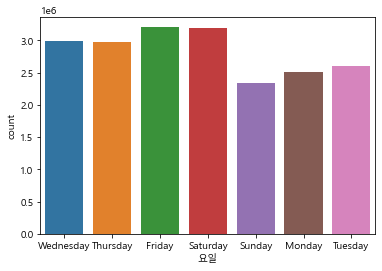

In [44]:
sns.countplot(data=train, x="요일")
plt.show()

In [49]:
from pandas import DataFrame
# 달력 시퀀스 생성
#day_count['date']= DataFrame(train.date_range(start = '2022-06-01', end = '2022-07-31'))
#day_count

In [ ]:
day_count['day']=day_count['date'].dt.day_name()

In [ ]:
day_count['month']=day_count['date'].dt.month

In [ ]:
day_count.groupby(['month','day']).nunique()

In [ ]:
# 월별 데이터 개수 확인 (문자 slice 에서 datetime 함수 사용으로 변경)
train_date = train['기준일자'].dt.month
train_date.value_counts()

# strd_tizn_val 기준시간대값

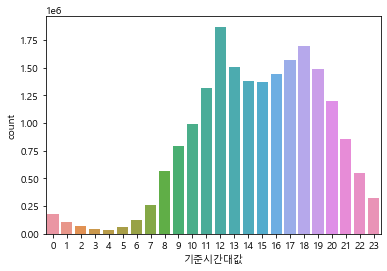

In [50]:
sns.countplot(data=train, x="기준시간대값")
plt.show()

12    1868338
18    1694757
17    1572824
13    1506544
19    1489109
16    1442025
14    1376985
15    1372627
11    1314582
20    1195138
10     994505
21     859462
9      795616
8      569291
22     550752
23     320037
7      264575
0      179156
6      129402
1      107873
2       67625
5       62917
3       44673
4       39077
Name: 기준시간대값, dtype: int64


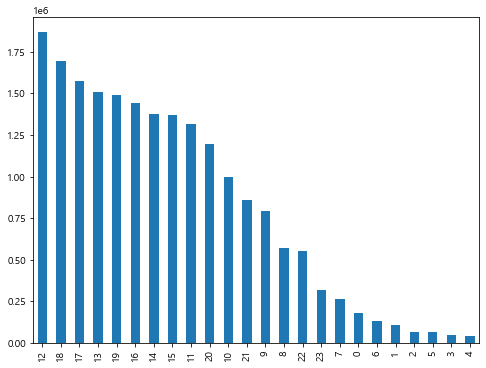

In [51]:
train.기준시간대값.value_counts().plot.bar(figsize=(8,6))
print(train.기준시간대값.value_counts())
#12시가 가장 많고, 그다음 18시가 많음

기준시간대값
0    16246.55
1    15740.90
2    13743.28
3    12932.71
4    12505.95
5    15498.67
6    16887.05
7    14349.19
8    11901.25
9    18150.00
10   22670.90
11   22812.83
12   21632.34
13   23183.51
14   24991.56
15   25486.19
16   25112.85
17   24750.51
18   25072.07
19   27651.14
20   27786.05
21   24125.75
22   20000.58
23   18217.67
Name: 총거래금액, dtype: float64

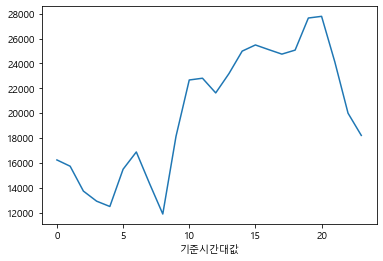

In [54]:
#시간대별 총 거래금액 평균 확인 -> 20시가 가장 많음
train.groupby(['기준시간대값'])['총거래금액'].mean().plot()
train.groupby(['기준시간대값'])['총거래금액'].mean()

# ccg_nm 시군구명

In [56]:
train.시군구명.unique()

array(['중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구',
       '금정구', '강서구', '연제구', '수영구', '사상구', '기장군'], dtype=object)

In [57]:
# 시군구명 별 갯수 확인
train['시군구명'].value_counts()

부산진구    2601857
해운대구    2237952
동래구     1826713
금정구     1580792
사하구     1465378
북구      1457065
연제구     1388438
남구      1373901
수영구     1152336
사상구     1083056
강서구      991997
기장군      703159
동구       541395
서구       501376
중구       485682
영도구      426793
Name: 시군구명, dtype: int64

In [58]:
# 시군구 별 평균 총거래금액 확인
# 정렬 한 코드로 합침.
train.groupby(['시군구명'])['총거래금액'].mean().sort_values()

시군구명
영도구    18963.79
동구     19517.92
서구     19744.36
금정구    21124.74
남구     21618.20
사하구    22178.78
사상구    22698.63
연제구    22928.75
북구     23192.46
중구     23459.16
수영구    23510.58
부산진구   23617.54
동래구    24801.53
해운대구   24987.71
강서구    27177.97
기장군    27248.33
Name: 총거래금액, dtype: float64

In [60]:
#시군구별 연령대 평균
train.groupby(['시군구명'])['age_range'].mean()
#강서구 가장 낮고, 동래구가 가장 높아보임 -> 외부 데이터 이용하여 확인해볼 예정

시군구명
강서구    39.50
금정구    39.97
기장군    41.10
남구     40.33
동구     41.47
동래구    42.04
부산진구   39.96
북구     41.72
사상구    41.24
사하구    41.77
서구     41.36
수영구    41.21
연제구    42.01
영도구    42.56
중구     40.94
해운대구   41.57
Name: age_range, dtype: float64

# cardc_nm 카드사명

In [61]:
train.카드사명.unique()

array(['코나', '부산', '하나', '동백택시', '농협', 'QR'], dtype=object)

In [62]:
#카드사명 별 사용개수 확인 -> 코나 (:코나아이) 가장 많이 사용
train['카드사명'].value_counts()

코나      10657974
하나       4953944
부산       3835938
농협        246179
동백택시      102864
QR         20991
Name: 카드사명, dtype: int64

In [45]:
#그래프로 확인
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' #->한글 안깨지게

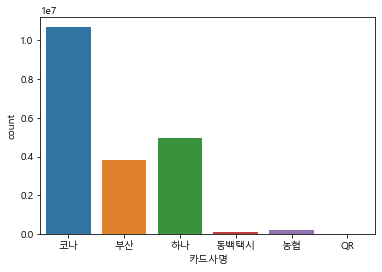

In [63]:
sns.countplot(data=train, x="카드사명")
plt.show()

# sex_cd 성별코드

In [64]:
train['성별코드'].value_counts()

F    10847158
M     8970732
Name: 성별코드, dtype: int64

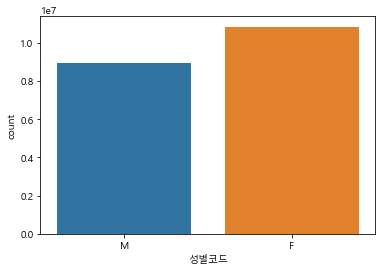

In [65]:
sns.countplot(data=train, x="성별코드")
plt.show()

In [66]:
train.groupby(['성별코드'])['총거래금액'].mean()

성별코드
F   23912.14
M   22547.84
Name: 총거래금액, dtype: float64

<AxesSubplot:xlabel='성별코드', ylabel='총거래금액'>

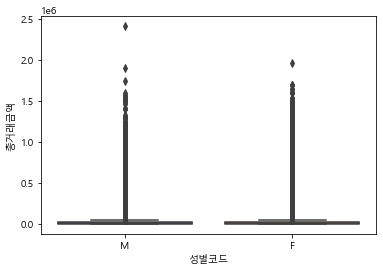

In [67]:
sns.boxplot(x = '성별코드', y = '총거래금액', data = train)

# trns_cnt 거래건수

In [68]:
train.거래건수.unique()

array([ 1,  2,  3,  4,  5,  6, 10,  7,  8, 11, 30,  9, 12, 13, 24, 40, 20,
       15, 14, 21, 16, 17, 19, 18, 22, 28, 55, 23, 31, 26, 29, 37, 34, 27,
       56, 71, 57, 35, 36, 38, 41, 64, 25, 32], dtype=int64)

In [69]:
train['거래건수'].value_counts()

1     18036085
2      1500251
3       212099
4        46074
5        13555
6         5129
7         2110
8         1037
9          533
10         320
11         211
12         126
13          99
14          61
15          40
16          26
17          26
18          17
20          16
19          13
24          10
22           7
21           6
23           5
30           5
26           4
28           3
29           3
40           3
32           2
64           1
38           1
57           1
56           1
55           1
41           1
34           1
37           1
36           1
35           1
31           1
27           1
25           1
71           1
Name: 거래건수, dtype: int64

In [70]:
train[train['거래건수']==40]

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일
300998,2022-06-01,19,금정구,장전1동,하나,5202,사무용 OA기기,F,40,7000,20,Wednesday
10251335,2022-07-01,17,동구,수정2동,부산,4010,편 의 점,F,40,160800,30,Friday
13203105,2022-07-10,15,사상구,주례2동,코나,9130,사무서비스,F,40,6720,20,Sunday


# ttl_trns_amt 총거래금액

In [71]:
train.sort_values(by=['총거래금액'], ascending = False).head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일
3674873,2022-06-11,10,해운대구,좌1동,하나,7014,한방병원,M,9,2413460,30,Saturday
15676481,2022-07-18,9,동구,범일2동,부산,7044,산후조리원,F,1,1970000,30,Monday
5803091,2022-06-17,11,북구,덕천2동,코나,6140,주차장,M,2,1906000,40,Friday
12378504,2022-07-08,10,해운대구,반여1동,코나,9305,학원,M,2,1748000,40,Friday
3458647,2022-06-10,17,부산진구,부암3동,부산,5105,보습학원,F,1,1700000,40,Friday


In [72]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19817890 entries, 0 to 19818000
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   기준일자       datetime64[ns]
 1   기준시간대값     int64         
 2   시군구명       object        
 3   행정동명       object        
 4   카드사명       object        
 5   업종코드       int64         
 6   업종명        object        
 7   성별코드       object        
 8   거래건수       int64         
 9   총거래금액      int64         
 10  age_range  int64         
 11  요일         object        
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 1.9+ GB
None


In [22]:
df.to_csv("df1.csv", index = False)

In [76]:
train=train.astype({'기준시간대값' : str,'업종코드' : str , '출생년도' : str , 'age_range' : str})

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [5]:
# 데이터 불러오기
df= pd.read_csv("df1.csv")
df.head()

,기준일자,기준시간대값,시군구명,행정동명,행정동번호,카드사명,업종코드,업종명,출생년도,성별코드,거래건수,총거래금액,age,age_range,요일
0,2022-06-01,0,중구,대청동,21010530,코나,4010,편 의 점,1973,M,1,7350,50,50,Wednesday
1,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1981,F,1,3700,42,40,Wednesday
2,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1992,M,1,7500,31,30,Wednesday
3,2022-06-01,0,중구,중앙동,21010510,부산,4010,편 의 점,1995,M,1,2700,28,20,Wednesday
4,2022-06-01,0,중구,중앙동,21010510,코나,4010,편 의 점,1976,M,1,13900,47,40,Wednesday


In [6]:
df=df.astype({'기준시간대값' : str,'행정동번호': str, '업종코드' : str , '출생년도' : str ,'age': str, 'age_range' : str})

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27135019 entries, 0 to 27135018
Data columns (total 15 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준일자       object
 1   기준시간대값     object
 2   시군구명       object
 3   행정동명       object
 4   행정동번호      object
 5   카드사명       object
 6   업종코드       object
 7   업종명        object
 8   출생년도       object
 9   성별코드       object
 10  거래건수       int64 
 11  총거래금액      int64 
 12  age        object
 13  age_range  object
 14  요일         object
dtypes: int64(2), object(13)
memory usage: 3.0+ GB
None


In [80]:
train['거래금액'] = train['총거래금액']/train['거래건수']

In [81]:
train.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일,거래금액
0,2022-06-01,0,중구,대청동,코나,4010,편 의 점,M,1,7350,50,Wednesday,7350.00
1,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,F,1,3700,40,Wednesday,3700.00
2,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,7500,30,Wednesday,7500.00
3,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,2700,20,Wednesday,2700.00
4,2022-06-01,0,중구,중앙동,코나,4010,편 의 점,M,1,13900,40,Wednesday,13900.00


In [82]:
train[train['거래건수']==40]

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일,거래금액
300998,2022-06-01,19,금정구,장전1동,하나,5202,사무용 OA기기,F,40,7000,20,Wednesday,175.00
10251335,2022-07-01,17,동구,수정2동,부산,4010,편 의 점,F,40,160800,30,Friday,4020.00
13203105,2022-07-10,15,사상구,주례2동,코나,9130,사무서비스,F,40,6720,20,Sunday,168.00


In [83]:
train.to_csv("train1.csv", index = False)

In [4]:
# 데이터 불러오기
train= pd.read_csv("train1.csv")
train.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일,거래금액
0,2022-06-01,0,중구,대청동,코나,4010,편 의 점,M,1,7350,50,Wednesday,7350.0
1,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,F,1,3700,40,Wednesday,3700.0
2,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,7500,30,Wednesday,7500.0
3,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,2700,20,Wednesday,2700.0
4,2022-06-01,0,중구,중앙동,코나,4010,편 의 점,M,1,13900,40,Wednesday,13900.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19817890 entries, 0 to 19817889
Data columns (total 13 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준일자       object 
 1   기준시간대값     int64  
 2   시군구명       object 
 3   행정동명       object 
 4   카드사명       object 
 5   업종코드       int64  
 6   업종명        object 
 7   성별코드       object 
 8   거래건수       int64  
 9   총거래금액      int64  
 10  age_range  int64  
 11  요일         object 
 12  거래금액       float64
dtypes: float64(1), int64(5), object(7)
memory usage: 1.9+ GB


In [30]:
def new_category(x):
    if x in [4004, 4111]:
        return '백화점/할인점'
    elif x in [4010, 4020, 4021, 4099]:
        return '편의점/마켓'
    elif x in [3101, 3102, 3199, 5201]:
        return '전자제품'
    elif x in [4201, 4203, 4204, 4205, 4206, 4210, 4299, 4301, 4399, 4302, 4303, 4304, 4401, 4410, 4411, 7105, 4420, 4421, 4430, 4499,4208,4209,4412]:
        return '의류/패션잡화'
    elif x in [8001, 8002, 8003, 8201]:
        return '한식'
    elif x in [8006, 8010]:
        return '양식'
    elif x in [8004]:
        return '일식'
    elif x in [8005]:
        return '중식'
    elif x in [8301]:
        return '제과점'
    elif x in [2201, 2202, 2210, 2215, 2220, 2230, 2240, 2010, 2020, 3401, 3402, 2299, 2250, 2251]:
        return '문화/취미'
    elif x in [3001, 3002, 3099, 5202, 5210, 9134, 9005, 9010, 3201, 3202, 9202, 9203, 3210, 4050,  8310, 8320, 8399, 8302, 8401, 8402, 8499, 9001, 9160, 7001, 7010, 7014, 7015, 7020, 7021, 7022, 7040, 7041, 7042, 7050, 7060, 7099, 7112, 9204, 9299, 9306, 4080, 9003, 9004, 8303,9210]:
        return '생활'
    elif x in [7101, 7102, 7103, 7110, 7111]:
        return '뷰티'
    elif x in [5001, 5002, 5099, 9304, 5010, 5030, 5050, 3499, 9305, 5101, 5102, 5103, 5104, 5040, 5199, 5121, 5122,5003,5105,5106,5191,5192]:
        return '교육'
    elif x in [2001, 2002, 2102, 2111, 2112, 2113, 2114, 2120, 2199, 9301, 9201, 2121, 2130]:
        return '레저'
    elif x in [1001, 1002, 1003, 1010, 1020, 1110, 1122, 1123, 1130]:
        return '여행/숙박'
    elif x in [6004, 6101, 6102, 6110, 6111, 6120, 6130, 6140, 6150, 6199, 9302,  3301, 3302, 3304, 3305, 3306, 3307, 3308, 3309, 3399,3311, 3313,6103]:
        return '자동차/에너지'
    elif x in [ 4110, 4121, 4199, 5299, 9099, 9020, 9101, 9110, 9120, 9130, 9132, 9133,  9199, 9998, 9395, 9396, 9397, 9398, 9601, 9602, 9699, 9901, 9910, 9911, 9121, 9135, 9002, 8013, 7120, 7121, 7199, 8101,4481,7044,8021,8031,9006,9210]:
        return '기타'
    else:
        return 'Unknown'

# apply 함수를 사용하여 새로운 칼럼 추가
train['업종대분류'] = train['업종코드'].apply(new_category)

print(train)

                기준일자  기준시간대값 시군구명 행정동명 카드사명  업종코드    업종명 성별코드  거래건수  총거래금액  \
0         2022-06-01       0   중구  대청동   코나  4010  편 의 점    M     1   7350   
1         2022-06-01       0   중구  중앙동   부산  4010  편 의 점    F     1   3700   
2         2022-06-01       0   중구  중앙동   부산  4010  편 의 점    M     1   7500   
3         2022-06-01       0   중구  중앙동   부산  4010  편 의 점    M     1   2700   
4         2022-06-01       0   중구  중앙동   코나  4010  편 의 점    M     1  13900   
...              ...     ...  ...  ...  ...   ...    ...  ...   ...    ...   
19817885  2022-07-01       0   중구  부평동   코나  4020   슈퍼마켓    M     1   3490   
19817886  2022-07-01       0   중구  부평동   코나  8001   일반한식    M     1  13500   
19817887  2022-07-01       0   중구  부평동   코나  8001   일반한식    F     1  44000   
19817888  2022-07-01       0   중구  부평동   코나  8001   일반한식    M     1  34500   
19817889  2022-07-01       0   중구  부평동   코나  8001   일반한식    M     1  81800   

          age_range         요일     거래금액   업종대분류  
0            

In [31]:
train[train['업종대분류']=='Unknown']

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일,거래금액,업종대분류


In [32]:
train.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,업종코드,업종명,성별코드,거래건수,총거래금액,age_range,요일,거래금액,업종대분류
0,2022-06-01,0,중구,대청동,코나,4010,편 의 점,M,1,7350,50,Wednesday,7350.0,편의점/마켓
1,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,F,1,3700,40,Wednesday,3700.0,편의점/마켓
2,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,7500,30,Wednesday,7500.0,편의점/마켓
3,2022-06-01,0,중구,중앙동,부산,4010,편 의 점,M,1,2700,20,Wednesday,2700.0,편의점/마켓
4,2022-06-01,0,중구,중앙동,코나,4010,편 의 점,M,1,13900,40,Wednesday,13900.0,편의점/마켓


In [33]:
train=train.drop(['업종코드'], axis=1)
train=train.drop(['업종명'], axis=1)

In [34]:
train.head()

,기준일자,기준시간대값,시군구명,행정동명,카드사명,성별코드,거래건수,총거래금액,age_range,요일,거래금액,업종대분류
0,2022-06-01,0,중구,대청동,코나,M,1,7350,50,Wednesday,7350.0,편의점/마켓
1,2022-06-01,0,중구,중앙동,부산,F,1,3700,40,Wednesday,3700.0,편의점/마켓
2,2022-06-01,0,중구,중앙동,부산,M,1,7500,30,Wednesday,7500.0,편의점/마켓
3,2022-06-01,0,중구,중앙동,부산,M,1,2700,20,Wednesday,2700.0,편의점/마켓
4,2022-06-01,0,중구,중앙동,코나,M,1,13900,40,Wednesday,13900.0,편의점/마켓


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19817890 entries, 0 to 19817889
Data columns (total 12 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준일자       object 
 1   기준시간대값     int64  
 2   시군구명       object 
 3   행정동명       object 
 4   카드사명       object 
 5   성별코드       object 
 6   거래건수       int64  
 7   총거래금액      int64  
 8   age_range  int64  
 9   요일         object 
 10  거래금액       float64
 11  업종대분류      object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.8+ GB


In [36]:
train=train.astype({'기준시간대값' : str, 'age_range' : str})

In [37]:
train.to_csv("train2.csv", index = False)

In [ ]:
# 데이터 불러오기
train= pd.read_csv("train2.csv")
train.head()

기준시간대값
0     15431.241895
1     14993.684306
10    21104.830763
11    21118.491541
12    19384.861800
13    21124.136230
14    23058.580970
15    23586.896291
16    23253.199740
17    22924.569127
18    22984.466034
19    25070.263483
2     13097.203301
20    25287.304817
21    22335.555717
22    18708.795659
23    17172.992351
3     12412.056012
4     12066.725330
5     15048.252521
6     16290.815671
7     13737.357751
8     11220.610512
9     17012.494214
Name: 거래금액, dtype: float64

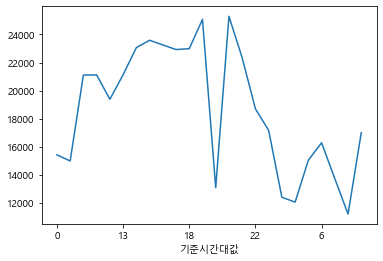

In [39]:
#시간대별 총 거래금액 평균 확인
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'
train.groupby(['기준시간대값'])['거래금액'].mean().plot()
train.groupby(['기준시간대값'])['거래금액'].mean()


In [40]:
train.groupby(['기준시간대값'])['거래금액'].mean().sort_values()

기준시간대값
8     11220.610512
4     12066.725330
3     12412.056012
2     13097.203301
7     13737.357751
1     14993.684306
5     15048.252521
0     15431.241895
6     16290.815671
9     17012.494214
23    17172.992351
22    18708.795659
12    19384.861800
10    21104.830763
11    21118.491541
13    21124.136230
21    22335.555717
17    22924.569127
18    22984.466034
14    23058.580970
16    23253.199740
15    23586.896291
19    25070.263483
20    25287.304817
Name: 거래금액, dtype: float64

In [41]:
train.groupby(['시군구명'])['거래금액'].mean().sort_values()

시군구명
영도구     18076.734550
동구      18416.147301
서구      18919.517227
금정구     19480.789089
남구      20053.198557
사하구     20971.637908
사상구     21143.165177
부산진구    21230.856307
연제구     21342.731122
북구      21497.819390
중구      21670.895329
수영구     21904.723538
동래구     23029.391267
해운대구    23083.102151
강서구     23294.297077
기장군     24136.956270
Name: 거래금액, dtype: float64

4월 캐시백 5%추가 -> 몰렸다가 점점 빠져서 6~8갈수록 점점 줄어든것이 아닐까 생각  
동네 clustering

주제 예측
모델링 할때 string 어떻게 처리할지
가중치 -> 요일별 count x 
거래건수 * count

In [47]:
#train=train.drop(['기준일자'], axis=1)
train=train.drop(['행정동명'],axis=1)

In [48]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 데이터셋 원핫인코딩 수행
train_encoded = encoder.fit_transform(train)

# 결과 확인
print(train_encoded.toarray())

MemoryError: Unable to allocate 24.8 TiB for an array with shape (19817890, 171660) and data type float64

In [50]:
one_hot = train.get_dummies(train['행정동명'])
train = train.drop('행정동명', axis=1)
train = pd.concat([train, one_hot], axis=1)

AttributeError: 'DataFrame' object has no attribute 'get_dummies'